# MNIST Handwritten Digit Recognition using Neural Network with Keras
 

  
<img src="https://cdn-images-1.medium.com/max/1600/0*At0wJRULTXvyA3EK.png" height='300' width='400' />

In [2]:
# imports for array-handling and plotting
%matplotlib inline 

import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import keras 

# fix random seed for reproducibility
np.random.seed(5)

Using TensorFlow backend.


For this example we will use the MNIST hand written digist dataset. 

In [3]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.utils import np_utils

## loads the dataset and divide into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


In [4]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
y_train[0:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [6]:
## How many classes and their counts
yn = np.unique(y_train, return_counts=True)
yn

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

<BarContainer object of 10 artists>

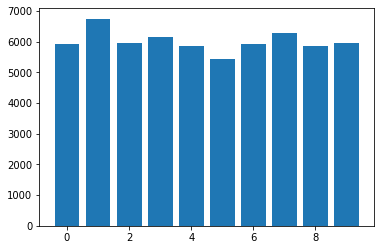

In [7]:
## plot the frequency of y's
plt.bar(yn[0],yn[1])


We now check the first nine data rows (pictures) and check their labels:

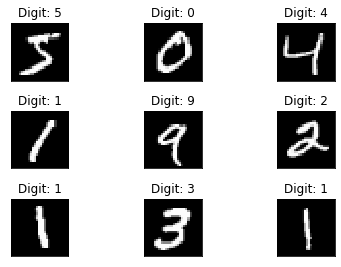

In [8]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


In [10]:
## reshape the dataset-fallten the data

# building the input vector from the 28x28 pixels-784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') # For decreasing the file size 
X_test = X_test.astype('float32')

In [11]:
# normalizing the data to help with the training - RGB-0-255
X_train /= 255
X_test /= 255

In [12]:
# print the final input shape ready for training
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


<p> we want classification model so we need to create one-hot encoding to categorize the labels (y) </p>
Before proceeding with the NN, we have to make a final transformation to the data: we have to change the format of the labels (y). For this we have to create an array of 10 positions for each y. Each position will indicate with a one if the y is the relevant category or zero if not:

<code>
y     ---->    Transformation
              0 1 2 3 4 5 6 7 8 9
0            [1,0,0,0,0,0,0,0,0,0]
1            [0,1,0,0,0,0,0,0,0,0]
    ...
8            [0,0,0,0,0,0,0,0,1,0]
9            [0,0,0,0,0,0,0,0,0,1]
</code>

This type of transformation is called one-hot encoding.

In [13]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding (train): ", Y_train.shape)
print("Shape after one-hot encoding (test): ", Y_test.shape)


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding (train):  (60000, 10)
Shape after one-hot encoding (test):  (10000, 10)


## Defining the Neural Network Architecture
 
First we have to import in keras the "Sequential" fucntion. This is the most common NN type, that means we are going to define our NN one layer a time.
 
Then we initialize the NN by defining our model object and will add to it the layers as we defined in our network architecture plan.
 
The layers that we will use are fully conected layers, which means that we want that all the input data from the previous layer will be connedted with all the nodes of this layer. In keras we call this layer type "Dense".

When defining the layer we have to provide some parameters: input_dim is the dimmention of the input (in our case we have 10 inputs (variables) that enter our hidden layer. 
 
Another parameter is the activation function. We can define this function inside the layer definition, or separately (see alternatives 1 and 2).

In [14]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
#from keras.utils import np_utils

In [48]:
# building a linear stack of layers with the sequential model
model = Sequential()
#first layer
model.add(Dense(512, input_shape=(784,))) #512 nodes - should be divided by 1024 bytes
model.add(Activation('relu'))                            
model.add(Dropout(0.3)) #0.2-20% from the nodes is droped randomly

#second layer
model.add(Dense(1054))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(10))

#activation function softmax for categorical outputs
model.add(Activation('softmax'))

## Training the model
 
To run our NN we have first to "compile" our model. The compilation require us to define some important parameters:
 
1. Define the <b>loss function</b>: this is the measure of the error. There are many types of loss functions that could be applied in NN's:
 - mean_squared_error
 - mean_absolute_error
 - mean_absolute_percentage_error
 - mean_squared_logarithmic_error
 - squared_hinge
 - hinge
 - categorical_hinge
 - logcosh
 - categorical_crossentropy
 - sparse_categorical_crossentropy
 - binary_crossentropy
 - kullback_leibler_divergence
 - poisson
 - cosine_proximity
 
 
2. Define the <b>optimizer</b>: this is the method we want to apply for the gradient descent. Some popular methods are:
 - Stochastic gradient descent (SGD)
 - Adaptive moment estimator (Adam)
 - batch gradient descent
 - mini-batch gradient descent 
 - Nesterov accelerated gradient (NAG)
 - Adagrad
 - AdaDelta
 - RMSprop

 
3. Define the <b>metrics</b>: Metric values are recorded at the end of each epoch on the training dataset. The most common metrics are:
 + For regression output:
    - Mean Squared Error (MSE)
    - Mean Absolute Error (MAE)
    - Mean Absolute Percentage Error (MAPE)
    - Cosine Proximity 
 
 + For classification output:
    - Binary Accuracy
    - Categorical Accuracy
    - Sparse Categorical Accuracy
    - Top k Categorical Accuracy
    - Sparse Top k Categorical Accuracy



In [49]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

After compilation, the model could be trained. We use the fit function to begin the training. 

In [50]:
# Fit the model
res = model.fit(X_train, 
          Y_train,
          batch_size=128, #the bigger the better but not to big
          epochs=20, #itterations number
          verbose=2, #0-no warning, 2 - slight warning
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 18s - loss: 0.2484 - acc: 0.9260 - val_loss: 0.1064 - val_acc: 0.9650
Epoch 2/20
 - 16s - loss: 0.1097 - acc: 0.9661 - val_loss: 0.0783 - val_acc: 0.9755
Epoch 3/20
 - 18s - loss: 0.0799 - acc: 0.9748 - val_loss: 0.0805 - val_acc: 0.9750
Epoch 4/20
 - 21s - loss: 0.0680 - acc: 0.9782 - val_loss: 0.0649 - val_acc: 0.9805
Epoch 5/20
 - 19s - loss: 0.0545 - acc: 0.9821 - val_loss: 0.0754 - val_acc: 0.9757
Epoch 6/20
 - 22s - loss: 0.0495 - acc: 0.9839 - val_loss: 0.0682 - val_acc: 0.9797
Epoch 7/20
 - 18s - loss: 0.0430 - acc: 0.9856 - val_loss: 0.0799 - val_acc: 0.9785
Epoch 8/20
 - 19s - loss: 0.0376 - acc: 0.9872 - val_loss: 0.0712 - val_acc: 0.9809
Epoch 9/20
 - 23s - loss: 0.0372 - acc: 0.9878 - val_loss: 0.0730 - val_acc: 0.9806
Epoch 10/20
 - 20s - loss: 0.0342 - acc: 0.9888 - val_loss: 0.0669 - val_acc: 0.9821
Epoch 11/20
 - 19s - loss: 0.0293 - acc: 0.9904 - val_loss: 0.0743 - val_acc: 0.9803
Epoch 12/20
 - 16s - los

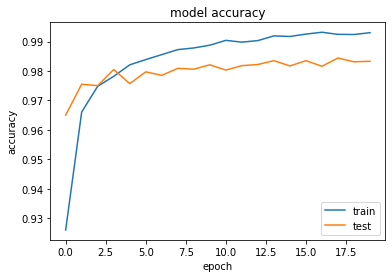

In [51]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

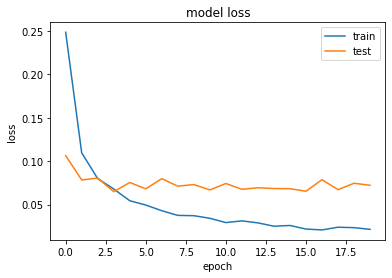

In [52]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


## Predicting using the model

We can then use the predict function to run the trained model on a new (test) dataset:

In [53]:
# calculate predictions
predict_classes = model.predict_classes(X_test)
# round predictions
#rounded = [round(x[0]) for x in predictions]
#print(rounded)

In [54]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(predict_classes == y_test)[0]
incorrect_indices = np.nonzero(predict_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")



9833  classified correctly
167  classified incorrectly


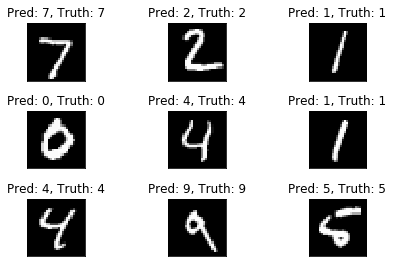

In [22]:
# plot 9 correct predictions
#fig = plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Pred: {}, Truth: {}".format(predict_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])


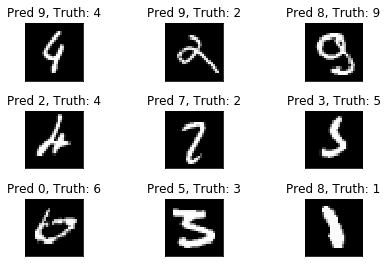

In [23]:
# plot 9 incorrect predictions
fig = plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred {}, Truth: {}".format(predict_classes[incorrect], y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])